In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

## k mean %

In [20]:
df1 = pd.read_pickle('kmean_percentage_allvar.pkl')
df1.head()

,UniqueID,Freq,Sex,Age,Age_Group,Hospital,HType,HRegion,Payer,Insurance_Type,...,General_Service_Treatment,Sex_Feminino,Sex_Masculino,Sex_Missing,Child,Early Working,Elderly,Mature Working,Prime Working,clusterID
0,00000f7264c27ba6fea0c837ed6aa0aa,4,Masculino,47.4,Prime Working,HCP,Large,Porto,MÉDIS,Private,...,0.0,0,1,0,0,0,0,0,1,1
1,00001e984eba85527fd3122056451279,8,Feminino,63.8,Mature Working,HCIS,Large,Lisbon,ALLIANZ,Private,...,0.0,1,0,0,0,0,0,1,0,6
2,0000219e4b37d2504fb6b8c28e24a2d4,1,Feminino,10.0,Child,ICDT,Clinic,Porto,MÉDIS,Private,...,0.0,1,0,0,1,0,0,0,0,1
3,000026c67a83fa72aec14512887bb173,2,Masculino,37.0,Prime Working,CCC,Medium,Lisbon,MÉDIS,Private,...,0.0,0,1,0,0,0,0,0,1,0
4,000028899fe7782862d40bb1b87807ee,2,Masculino,11.5,Child,HCD,Large,Lisbon,ADSE,State,...,0.0,0,1,0,1,0,0,0,0,4


In [21]:
labels = df1['clusterID']

In [22]:
df1 = df1._get_numeric_data()
columns1 = df1.columns

In [23]:
# standardize numerical columns
x1 = df1.values
min_max_scaler1 = preprocessing.MinMaxScaler()
x_scaled1 = min_max_scaler1.fit_transform(x1)
norm_df1 = pd.DataFrame(x_scaled1)
norm_df1.columns = columns1
norm_df1['clusterID'] = labels
norm_df1.head()

,Freq,Age,Clinic,Large_Hospital,Medium_Hospital,Payer_Other,Payer_Out_of_Pocket,Payer_Private,Payer_Special_Program,Payer_State,...,General_Service_Treatment,Sex_Feminino,Sex_Masculino,Sex_Missing,Child,Early Working,Elderly,Mature Working,Prime Working,clusterID
0,0.003555,0.430909,0.4,0.6,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.008294,0.580000,0.0,1.0,0.0,0.0,0.0,0.8,0.0,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
2,0.000000,0.090909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.001185,0.336364,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.001185,0.104545,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4


In [24]:
# function that gives a summary for each cluster
def graph_summary_clustering(results):
    """this function produces a summary of the clusters"""
    cluster_size = results.groupby(['clusterID']).size().reset_index()
    cluster_size.columns = ['clusterID', 'Count']
    cluster_means = results.groupby(['clusterID'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='clusterID')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("clusterID")
    return cluster_summary[sorted(cluster_summary.columns)]

In [27]:
cluster_summary1 = graph_summary_clustering(norm_df1)
cluster_summary1

,Age,Child,Clinic,Early Working,Elderly,Freq,General_Service_Appointment,General_Service_Emergency,General_Service_Examination,General_Service_Others,...,Payer_Special_Program,Payer_State,Prime Working,Sex_Feminino,Sex_Masculino,Sex_Missing,region_Lisbon,region_Porto,region_Santarem,region_Viseu
clusterID,,,,,,,,,,,,,,,,,,,,,
0,0.363383,0.189164,0.053240,0.098038,0.163904,0.011806,0.354647,0.115761,0.429918,0.005483,...,0.000816,0.209854,0.432147,0.543516,0.456484,0.0,0.997242,0.001149,0.001253,0.000356
1,0.359541,0.195059,0.360172,0.085006,0.160208,0.007126,0.453779,0.078171,0.360651,0.002351,...,0.000381,0.248538,0.438366,0.554399,0.445601,0.0,0.002055,0.997404,0.000044,0.000497
2,0.401195,0.111027,0.003891,0.087444,0.188355,0.005492,0.430039,0.115617,0.377969,0.001770,...,0.003342,0.205529,0.472757,0.541637,0.458363,0.0,0.019774,0.000269,0.979914,0.000043
3,0.358429,0.191277,0.207695,0.081691,0.158291,0.008282,0.444362,0.058836,0.406588,0.004640,...,0.028392,0.193962,0.454284,0.000000,0.000000,1.0,0.745685,0.220815,0.012245,0.021254
4,0.296140,0.263792,0.263130,0.116026,0.089446,0.005972,0.523852,0.121818,0.245503,0.000512,...,0.001137,0.046488,0.455936,0.452706,0.547294,0.0,0.997207,0.001416,0.001128,0.000250
5,0.388489,0.165909,0.273482,0.102612,0.226567,0.007762,0.394396,0.093948,0.424155,0.007192,...,0.960484,0.001917,0.386758,0.413233,0.586767,0.0,0.835111,0.119264,0.044605,0.001020
6,0.464910,0.032090,0.367683,0.056844,0.260584,0.009897,0.255776,0.024360,0.675363,0.011756,...,0.000852,0.398586,0.473402,0.709211,0.290789,0.0,0.980308,0.018001,0.001247,0.000444
7,0.403979,0.133092,0.003067,0.088508,0.210216,0.002073,0.358435,0.110988,0.480576,0.001833,...,0.029884,0.417806,0.420195,0.573677,0.426323,0.0,0.003576,0.005026,0.000068,0.991330


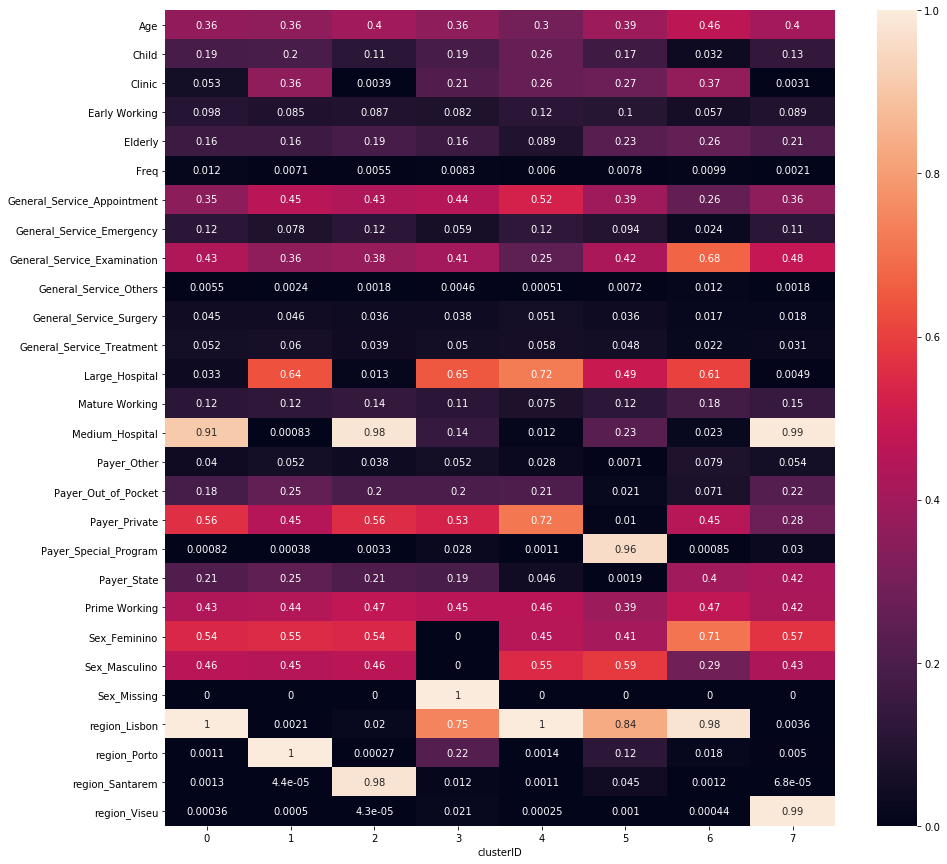

In [32]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(cluster_summary1.transpose(), annot=True)
plt.savefig("kmean%_heat.png")

In [31]:
labels.value_counts()

4    440487
6    338490
1    319847
0    214406
2     64750
5     47743
7     37861
3      4517
Name: clusterID, dtype: int64

## k mean famd

In [44]:
df2 = pd.read_pickle('kmean_famd_allvariables.pkl')
df2.reset_index(inplace=True)
df2.head()

,UniqueID,Freq,Sex,Age,Age_Group,Hospital,HType,HRegion,Payer,Insurance_Type,...,General_Service_Treatment,Sex_Feminino,Sex_Masculino,Sex_Missing,Child,Early Working,Elderly,Mature Working,Prime Working,clusterID
0,00000f7264c27ba6fea0c837ed6aa0aa,4,Masculino,47.4,Prime Working,HCP,Large,Porto,MÉDIS,Private,...,0.0,0,1,0,0,0,0,0,1,4
1,00001e984eba85527fd3122056451279,8,Feminino,63.8,Mature Working,HCIS,Large,Lisbon,ALLIANZ,Private,...,0.0,1,0,0,0,0,0,1,0,7
2,0000219e4b37d2504fb6b8c28e24a2d4,1,Feminino,10.0,Child,ICDT,Clinic,Porto,MÉDIS,Private,...,0.0,1,0,0,1,0,0,0,0,6
3,000026c67a83fa72aec14512887bb173,2,Masculino,37.0,Prime Working,CCC,Medium,Lisbon,MÉDIS,Private,...,0.0,0,1,0,0,0,0,0,1,3
4,000028899fe7782862d40bb1b87807ee,2,Masculino,11.5,Child,HCD,Large,Lisbon,ADSE,State,...,0.0,0,1,0,1,0,0,0,0,5


In [45]:
labels2 = df2['clusterID']

In [46]:
df2 = df2._get_numeric_data()
columns2 = df2.columns

x2 = df2.values
min_max_scaler2 = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler2.fit_transform(x2)
norm_df2 = pd.DataFrame(x_scaled2)
norm_df2.columns = columns2
norm_df2['clusterID'] = labels2
norm_df2.head()

,Freq,Age,Clinic,Large_Hospital,Medium_Hospital,Payer_Other,Payer_Out_of_Pocket,Payer_Private,Payer_Special_Program,Payer_State,...,General_Service_Treatment,Sex_Feminino,Sex_Masculino,Sex_Missing,Child,Early Working,Elderly,Mature Working,Prime Working,clusterID
0,0.003555,0.430909,0.4,0.6,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,0.008294,0.580000,0.0,1.0,0.0,0.0,0.0,0.8,0.0,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7
2,0.000000,0.090909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
3,0.001185,0.336364,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,0.001185,0.104545,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5


In [47]:
cluster_summary2 = graph_summary_clustering(norm_df2)
cluster_summary2

,Age,Child,Clinic,Early Working,Elderly,Freq,General_Service_Appointment,General_Service_Emergency,General_Service_Examination,General_Service_Others,...,Payer_Special_Program,Payer_State,Prime Working,Sex_Feminino,Sex_Masculino,Sex_Missing,region_Lisbon,region_Porto,region_Santarem,region_Viseu
clusterID,,,,,,,,,,,,,,,,,,,,,
0,0.433091,0.121481,0.523193,0.108574,0.254823,0.010730,0.386688,0.046215,0.481483,0.007680,...,0.000485,0.947204,0.327641,0.642352,0.355207,0.002441,0.633524,0.197675,0.077655,0.091146
1,0.333033,0.231230,0.046141,0.082399,0.122964,0.008649,0.372892,0.122299,0.396993,0.002954,...,0.055625,0.005889,0.458598,0.000000,0.997086,0.002914,0.997488,0.001037,0.001275,0.000199
2,0.407015,0.146417,0.333616,0.088455,0.265129,0.002756,0.571900,0.082136,0.285683,0.002744,...,0.001423,0.010849,0.384386,0.552776,0.443592,0.003632,0.708851,0.192260,0.058876,0.040013
3,0.349052,0.175595,0.032037,0.093845,0.117869,0.010065,0.364990,0.119817,0.421618,0.004295,...,0.064058,0.005654,0.503873,0.504836,0.493133,0.002030,0.718286,0.001207,0.209416,0.071092
4,0.336488,0.238907,0.057637,0.083579,0.141259,0.006858,0.396737,0.114114,0.374742,0.003006,...,0.019336,0.237549,0.429352,0.548676,0.448534,0.002791,0.003542,0.995753,0.000048,0.000657
5,0.462001,0.092071,0.043152,0.087073,0.317305,0.005634,0.218889,0.070535,0.642064,0.004921,...,0.048459,0.833431,0.327591,0.655280,0.341129,0.003590,0.998013,0.000720,0.001021,0.000246
6,0.349858,0.131790,0.903437,0.096513,0.099601,0.007558,0.497325,0.023261,0.407399,0.006328,...,0.061357,0.006033,0.568888,0.521016,0.476755,0.002230,0.778157,0.221207,0.000426,0.000210
7,0.335696,0.186324,0.048808,0.083696,0.100760,0.010552,0.363044,0.109357,0.430881,0.004977,...,0.021116,0.010025,0.530018,0.994860,0.000000,0.005140,0.997408,0.001039,0.001381,0.000172


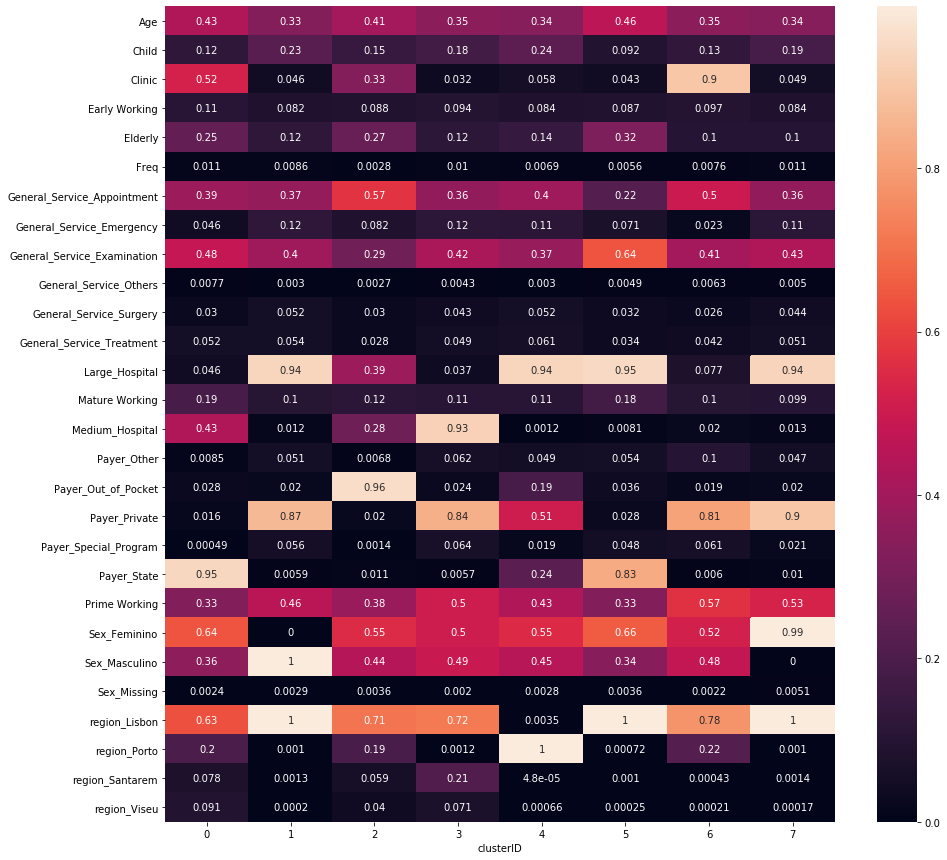

In [48]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(cluster_summary2.transpose(), annot=True)
plt.savefig("kmeanfamd_heat.png")

## kprototype

In [59]:
df3 = pd.read_pickle('kproto_allvar.pkl')
df3.head()

,UniqueID,Freq,Sex,Age,Age_Group,Hospital,HType,HRegion,Payer,Insurance_Type,...,General_Service_Treatment,Sex_Feminino,Sex_Masculino,Sex_Missing,Child,Early Working,Elderly,Mature Working,Prime Working,clusterID
0,00000f7264c27ba6fea0c837ed6aa0aa,4,Masculino,47.4,Prime Working,HCP,Large,Porto,MÉDIS,Private,...,0.0,0,1,0,0,0,0,0,1,5
1,00001e984eba85527fd3122056451279,8,Feminino,63.8,Mature Working,HCIS,Large,Lisbon,ALLIANZ,Private,...,0.0,1,0,0,0,0,0,1,0,7
2,0000219e4b37d2504fb6b8c28e24a2d4,1,Feminino,10.0,Child,ICDT,Clinic,Porto,MÉDIS,Private,...,0.0,1,0,0,1,0,0,0,0,5
3,000026c67a83fa72aec14512887bb173,2,Masculino,37.0,Prime Working,CCC,Medium,Lisbon,MÉDIS,Private,...,0.0,0,1,0,0,0,0,0,1,1
4,000028899fe7782862d40bb1b87807ee,2,Masculino,11.5,Child,HCD,Large,Lisbon,ADSE,State,...,0.0,0,1,0,1,0,0,0,0,4


In [60]:
df3['clusterID'].value_counts()

4    261815
7    247852
6    245946
1    236009
2    202977
5    160120
0    103907
3      9475
Name: clusterID, dtype: int64

In [61]:
labels3 = df3['clusterID']

df3 = df3._get_numeric_data()
columns3 = df3.columns

x3 = df3.values
min_max_scaler3 = preprocessing.MinMaxScaler()
x_scaled3 = min_max_scaler3.fit_transform(x3)
norm_df3 = pd.DataFrame(x_scaled3)
norm_df3.columns = columns3
norm_df3['clusterID'] = labels3
norm_df3.head()

,Freq,Age,Clinic,Large_Hospital,Medium_Hospital,Payer_Other,Payer_Out_of_Pocket,Payer_Private,Payer_Special_Program,Payer_State,...,General_Service_Treatment,Sex_Feminino,Sex_Masculino,Sex_Missing,Child,Early Working,Elderly,Mature Working,Prime Working,clusterID
0,0.003555,0.430909,0.4,0.6,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
1,0.008294,0.580000,0.0,1.0,0.0,0.0,0.0,0.8,0.0,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7
2,0.000000,0.090909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
3,0.001185,0.336364,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.001185,0.104545,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4


In [62]:
cluster_summary3 = graph_summary_clustering(norm_df3)
cluster_summary3

,Age,Child,Clinic,Early Working,Elderly,Freq,General_Service_Appointment,General_Service_Emergency,General_Service_Examination,General_Service_Others,...,Payer_Special_Program,Payer_State,Prime Working,Sex_Feminino,Sex_Masculino,Sex_Missing,region_Lisbon,region_Porto,region_Santarem,region_Viseu
clusterID,,,,,,,,,,,,,,,,,,,,,
0,0.434564,0.059496,0.228446,0.045704,0.200208,0.040375,0.307813,0.040170,0.452438,0.009523,...,0.027411,0.198401,0.527963,0.653806,0.343605,0.002589,0.808591,0.167685,0.022475,0.001249
1,0.365832,0.001860,0.586152,0.060705,0.001576,0.004166,0.526928,0.041322,0.368336,0.006008,...,0.035886,0.074768,0.874441,0.345826,0.651751,0.002424,0.763129,0.149081,0.065331,0.022458
2,0.635611,0.000000,0.210431,0.000000,0.679579,0.004031,0.433807,0.061254,0.393653,0.002024,...,0.045694,0.054026,0.072437,0.354774,0.641501,0.003725,0.685113,0.229270,0.056329,0.029287
3,0.532770,0.029763,0.310087,0.028074,0.433034,0.125478,0.227314,0.018749,0.311768,0.006555,...,0.034691,0.368155,0.311029,0.616253,0.378153,0.005594,0.709839,0.283115,0.006684,0.000361
4,0.088311,0.750457,0.197394,0.208674,0.000000,0.005184,0.486545,0.178622,0.285873,0.001161,...,0.037934,0.156440,0.040869,0.447453,0.548670,0.003877,0.876073,0.070728,0.031226,0.021973
5,0.213121,0.283231,0.175295,0.234961,0.000000,0.004080,0.479303,0.100586,0.331117,0.003609,...,0.022690,0.177889,0.480977,0.453891,0.543599,0.002511,0.079291,0.854672,0.045284,0.020753
6,0.337471,0.009287,0.108009,0.086324,0.000972,0.004943,0.246635,0.115215,0.548767,0.006903,...,0.025591,0.089247,0.873863,0.790312,0.206188,0.003501,0.868621,0.068901,0.038851,0.023627
7,0.550165,0.000000,0.271541,0.000040,0.331730,0.004926,0.360773,0.042046,0.522088,0.004924,...,0.030819,0.669230,0.320578,0.799848,0.197775,0.002376,0.664096,0.236987,0.050861,0.048056


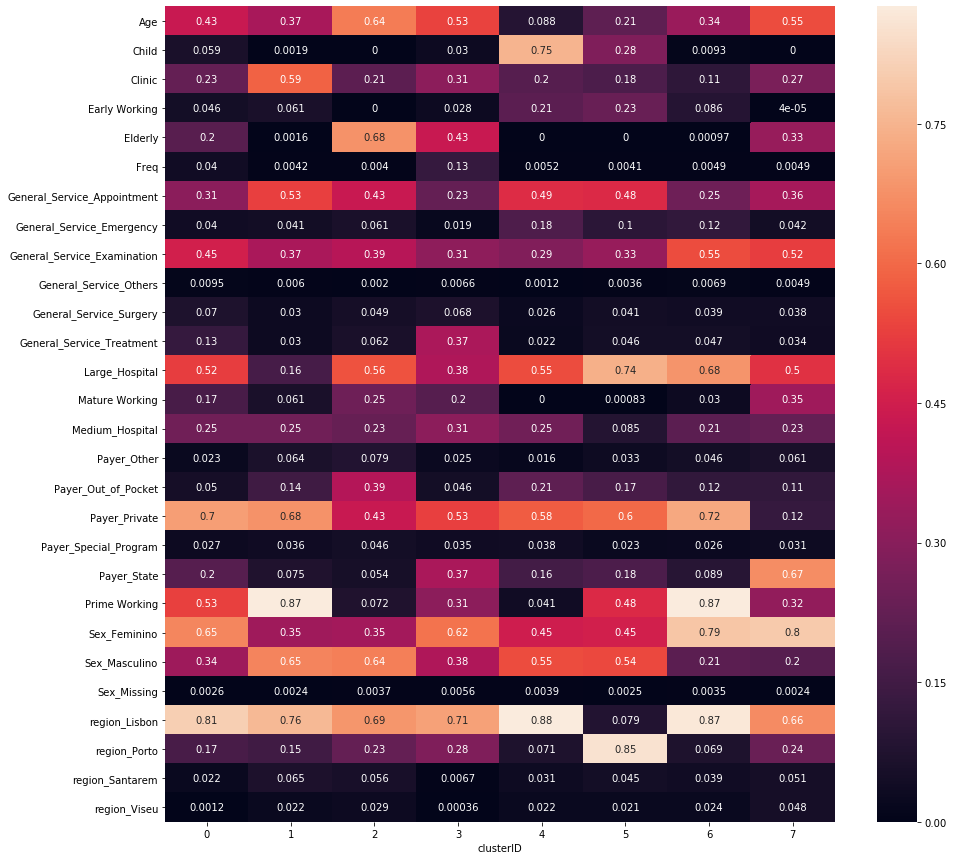

In [63]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(cluster_summary3.transpose(), annot=True)
plt.savefig("kproto_heat.png")

## kmode

In [66]:
df4 = pd.read_pickle('kmode_allvar.pkl')
df4.head()

,UniqueID,Freq,Sex,Age,Age_Group,Hospital,HType,HRegion,Payer,Insurance_Type,...,General_Service_Treatment,Sex_Feminino,Sex_Masculino,Sex_Missing,Child,Early Working,Elderly,Mature Working,Prime Working,clusterID
0,00000f7264c27ba6fea0c837ed6aa0aa,4,Masculino,47.4,Prime Working,HCP,Large,Porto,MÉDIS,Private,...,0.0,0,1,0,0,0,0,0,1,0
1,00001e984eba85527fd3122056451279,8,Feminino,63.8,Mature Working,HCIS,Large,Lisbon,ALLIANZ,Private,...,0.0,1,0,0,0,0,0,1,0,0
2,0000219e4b37d2504fb6b8c28e24a2d4,1,Feminino,10.0,Child,ICDT,Clinic,Porto,MÉDIS,Private,...,0.0,1,0,0,1,0,0,0,0,7
3,000026c67a83fa72aec14512887bb173,2,Masculino,37.0,Prime Working,CCC,Medium,Lisbon,MÉDIS,Private,...,0.0,0,1,0,0,0,0,0,1,4
4,000028899fe7782862d40bb1b87807ee,2,Masculino,11.5,Child,HCD,Large,Lisbon,ADSE,State,...,0.0,0,1,0,1,0,0,0,0,1


In [67]:
df4['clusterID'].value_counts()

0    480700
3    153942
1    148768
2    131560
6    124373
5    100402
7     86613
8     84509
4     81537
9     75697
Name: clusterID, dtype: int64

In [68]:
labels4 = df4['clusterID']

df4 = df4._get_numeric_data()
columns4 = df4.columns

x4 = df4.values
min_max_scaler4 = preprocessing.MinMaxScaler()
x_scaled4 = min_max_scaler4.fit_transform(x4)
norm_df4 = pd.DataFrame(x_scaled4)
norm_df4.columns = columns4
norm_df4['clusterID'] = labels4
norm_df4.head()

,Freq,Age,Clinic,Large_Hospital,Medium_Hospital,Payer_Other,Payer_Out_of_Pocket,Payer_Private,Payer_Special_Program,Payer_State,...,General_Service_Treatment,Sex_Feminino,Sex_Masculino,Sex_Missing,Child,Early Working,Elderly,Mature Working,Prime Working,clusterID
0,0.003555,0.430909,0.4,0.6,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.008294,0.580000,0.0,1.0,0.0,0.0,0.0,0.8,0.0,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.000000,0.090909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
3,0.001185,0.336364,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,0.001185,0.104545,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [69]:
cluster_summary4 = graph_summary_clustering(norm_df4)
cluster_summary4

,Age,Child,Clinic,Early Working,Elderly,Freq,General_Service_Appointment,General_Service_Emergency,General_Service_Examination,General_Service_Others,...,Payer_Special_Program,Payer_State,Prime Working,Sex_Feminino,Sex_Masculino,Sex_Missing,region_Lisbon,region_Porto,region_Santarem,region_Viseu
clusterID,,,,,,,,,,,,,,,,,,,,,
0,0.327931,0.182927,0.106664,0.081427,0.073081,0.008951,0.390624,0.104988,0.400958,0.004574,...,0.026689,0.039034,0.573462,0.715796,0.280526,0.003678,0.814731,0.137847,0.035960,0.011462
1,0.317535,0.364070,0.180908,0.123629,0.170292,0.008480,0.455107,0.120690,0.355244,0.004240,...,0.047588,0.577086,0.183588,0.330172,0.667711,0.002117,0.756953,0.057761,0.100852,0.084434
2,0.447451,0.143737,0.071926,0.092391,0.379355,0.007287,0.189603,0.123125,0.591082,0.002573,...,0.043896,0.149544,0.236189,0.217779,0.779561,0.002660,0.816209,0.139627,0.024623,0.019541
3,0.413978,0.087877,0.691226,0.087637,0.217952,0.005173,0.606378,0.031440,0.288834,0.003125,...,0.018658,0.151023,0.471171,0.460875,0.535565,0.003560,0.191206,0.737815,0.040309,0.030670
4,0.368371,0.096790,0.096559,0.069846,0.082417,0.011445,0.239528,0.105222,0.532475,0.008687,...,0.047029,0.047840,0.652550,0.305456,0.691796,0.002747,0.800797,0.060995,0.108724,0.029484
5,0.395337,0.132975,0.109967,0.084610,0.203950,0.003428,0.533323,0.075847,0.318996,0.004318,...,0.042455,0.055104,0.457899,0.326248,0.668762,0.004990,0.801646,0.140595,0.039517,0.018242
6,0.390955,0.124231,0.142672,0.080821,0.142668,0.006728,0.233622,0.104968,0.564337,0.003993,...,0.019083,0.644932,0.497101,0.830019,0.167448,0.002533,0.199825,0.728906,0.027074,0.044195
7,0.270100,0.365453,0.756747,0.141826,0.087874,0.007634,0.586586,0.050004,0.299206,0.003026,...,0.028811,0.062424,0.287543,0.814947,0.182963,0.002090,0.899259,0.066970,0.023002,0.010769
8,0.367184,0.060147,0.750254,0.082121,0.069507,0.006241,0.547989,0.023715,0.370165,0.006801,...,0.054291,0.083838,0.688033,0.205079,0.792933,0.001988,0.854464,0.075806,0.057877,0.011854


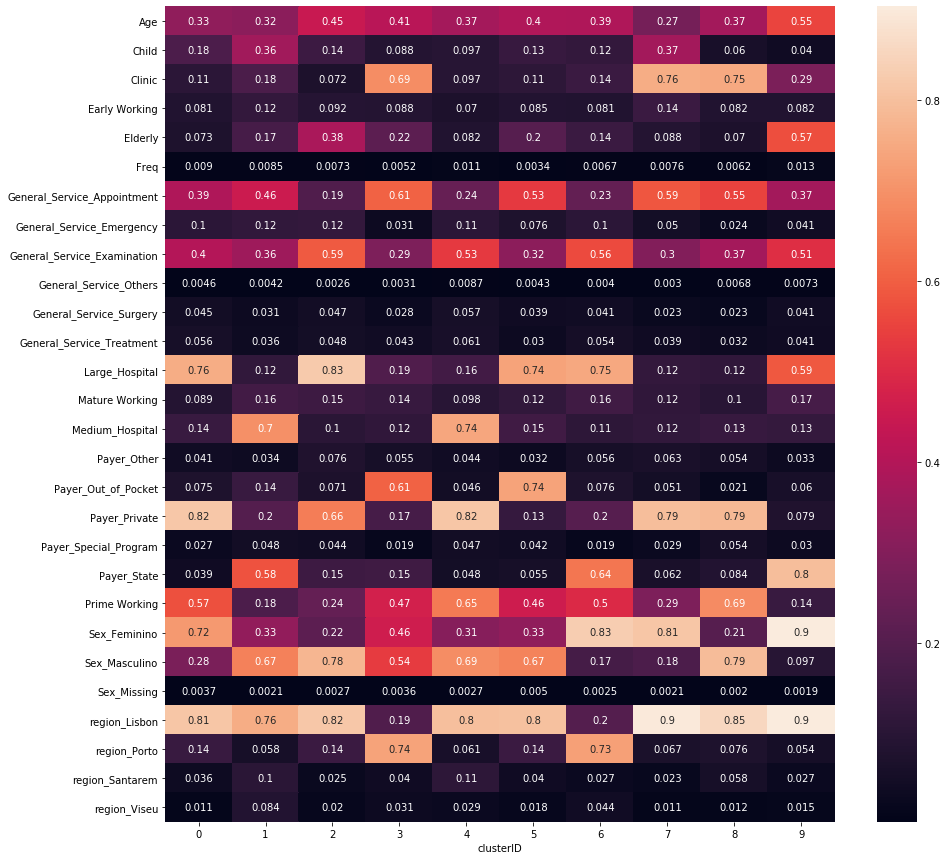

In [70]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(cluster_summary4.transpose(), annot=True)
plt.savefig("kmode_heat.png")

In [71]:
df1.columns

Index(['Freq', 'Age', 'Clinic', 'Large_Hospital', 'Medium_Hospital',
       'Payer_Other', 'Payer_Out_of_Pocket', 'Payer_Private',
       'Payer_Special_Program', 'Payer_State', 'region_Lisbon', 'region_Porto',
       'region_Santarem', 'region_Viseu', 'General_Service_Appointment',
       'General_Service_Emergency', 'General_Service_Examination',
       'General_Service_Others', 'General_Service_Surgery',
       'General_Service_Treatment', 'Sex_Feminino', 'Sex_Masculino',
       'Sex_Missing', 'Child', 'Early Working', 'Elderly', 'Mature Working',
       'Prime Working', 'clusterID'],
      dtype='object')